## Sumário

[Implementação](#)

* [Leitura, visualização e pré-processamento do dataset](#)

* [Conversão do array de predições Y](#)

* [Definição de Topologia da Rede](#)
    
    * [Arquitetura 1](#)
    * [Arquitetura 2](#)
    * [Arquitetura 3](#)
    * [Arquitetura 4](#)
    * [Arquitetura 5](#)
    
* [Comparações](#)

[Referências](#)

## Imports

In [1]:
import numpy as np
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
import matplotlib.pyplot as plt

%matplotlib inline

Using TensorFlow backend.


## Implementação

### Leitura, visualização e pré-processamento do dataset
Ao utilizar Redes Neurais para imagens, cada entrada é um pixel. Dessa forma, após a leitura do dataset, precisa-se descobrir as dimensões da imagem, a quantidade de instâncias, quantas classes e entradas são necessárias para o problema.

Feito isso, algumas técnicas de pré-processamento devem ser utilizadas para melhores resultados, dentre eles converter a imagem para tons de cinza e normalizar.

((60000, 784), (60000,), (10000, 784), (10000,))

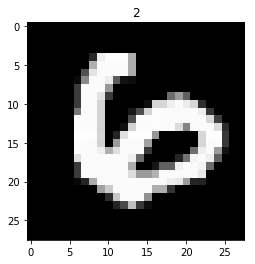

In [2]:
# carrega dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.imshow(x_train[9000], cmap=plt.get_cmap('gray'))
plt.title(y_train[5])

# normalizando entrada
x_train, x_test = x_train.reshape(-1,784)/255.0, x_test.reshape(-1,784)/255.0

x_train.shape, y_train.shape, x_test.shape, y_test.shape

### Conversão do array de predições Y

Baseado no número de classes do problema, represente a saída como one-hot encoding.

In [3]:
# numero de classes
D_out = 10
# one hot encoding
y_train_oh, y_test_oh = to_categorical(y_train, D_out), to_categorical(y_test, D_out)

y_train_oh.shape, y_test_oh.shape

((60000, 10), (10000, 10))

### Definição de Topologia da Rede
Mostre as três arquiteturas que serão utilizadas para resolver o problema. As arquiteturas devem ser simples de forma a retornar bons resultados com a menor quantidade necessária de neurônios e camadas. As três arquiteturas devem variar apenas quanto ao número de neurônios e camadas (incluindo regularização). Baseado nisso, explique:

* Quantos neurônios serão utilizados em cada camada?
* Quantas camadas serão utilizadas?
* É necessário utilizar regularização? Se sim explique a técnica que foi utilizada e o impacto nos resultados
* Qual função de ativação será utilizada? Escolha duas funções de ativação e explique os resultados obtidos

#### 1. Arquitetura

In [4]:
classifier = Sequential()
classifier.add(Dense(units=20, activation='relu', input_shape=(x_train.shape[1],)))
classifier.add(Dense(units=20, activation='relu'))
classifier.add(Dense(D_out, activation='sigmoid'))

classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________


In [5]:
classifier.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
history1 = classifier.fit(x=x_train, y=y_train_oh, epochs=30, verbose=1, validation_data=(x_test, y_test_oh))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 11s 179us/step - loss: 0.4421 - acc: 0.8688 - val_loss: 0.2377 - val_acc: 0.9322
Epoch 2/30
60000/60000 [==============================] - 9s 146us/step - loss: 0.2351 - acc: 0.9327 - val_loss: 0.2003 - val_acc: 0.9391
Epoch 3/30
60000/60000 [==============================] - 8s 127us/step - loss: 0.1955 - acc: 0.9436 - val_loss: 0.1746 - val_acc: 0.9483
Epoch 4/30
60000/60000 [==============================] - 8s 125us/step - loss: 0.1706 - acc: 0.9508 - val_loss: 0.1688 - val_acc: 0.9500
Epoch 5/30
60000/60000 [==============================] - 8s 138us/step - loss: 0.1556 - acc: 0.9552 - val_loss: 0.1551 - val_acc: 0.9538
Epoch 6/30
60000/60000 [==============================] - 8s 128us/step - loss: 0.1429 - acc: 0.9583 - val_loss: 0.1481 - val_acc: 0.9563
Epoch 7/30
60000/60000 [==============================] - 7s 124us/step - loss: 0.1337 - acc: 0.9609 - val_loss: 0.1467 -

Text(0.5,0,'epoch')

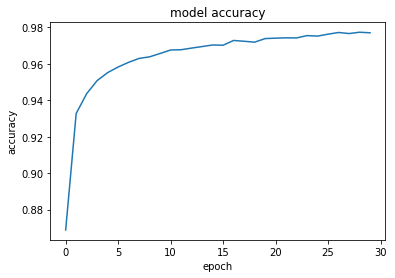

In [6]:
plt.plot(history1.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

Text(0.5,0,'epoch')

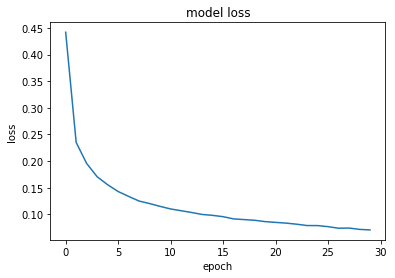

In [7]:
plt.plot(history1.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

#### 2. Arquitetura

In [8]:
classifier = Sequential()
classifier.add(Dense(units=20, activation='relu', input_shape=(x_train.shape[1],)))
classifier.add(Dense(units=30, activation='relu'))
classifier.add(Dense(D_out, activation='softmax'))

classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_5 (Dense)              (None, 30)                630       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                310       
Total params: 16,640
Trainable params: 16,640
Non-trainable params: 0
_________________________________________________________________


In [9]:
classifier.compile(optimizer='sgd', loss='categorical_crossentropy',  metrics=['accuracy'])
history2 = classifier.fit(x=x_train, y=y_train_oh, epochs=30, verbose=1, validation_data=(x_test, y_test_oh))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 6s 98us/step - loss: 0.7900 - acc: 0.7733 - val_loss: 0.3648 - val_acc: 0.8972
Epoch 2/30
60000/60000 [==============================] - 5s 86us/step - loss: 0.3452 - acc: 0.9010 - val_loss: 0.3132 - val_acc: 0.9082
Epoch 3/30
60000/60000 [==============================] - 6s 98us/step - loss: 0.2982 - acc: 0.9150 - val_loss: 0.2699 - val_acc: 0.9209
Epoch 4/30
60000/60000 [==============================] - 5s 89us/step - loss: 0.2706 - acc: 0.9231 - val_loss: 0.2523 - val_acc: 0.9283
Epoch 5/30
60000/60000 [==============================] - 5s 88us/step - loss: 0.2508 - acc: 0.9280 - val_loss: 0.2405 - val_acc: 0.9305
Epoch 6/30
60000/60000 [==============================] - 5s 81us/step - loss: 0.2344 - acc: 0.9327 - val_loss: 0.2333 - val_acc: 0.9339
Epoch 7/30
60000/60000 [==============================] - 5s 82us/step - loss: 0.2210 - acc: 0.9358 - val_loss: 0.2133 - val_acc

Text(0.5,0,'epoch')

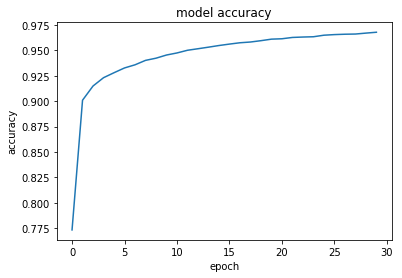

In [10]:
plt.plot(history2.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

Text(0.5,0,'epoch')

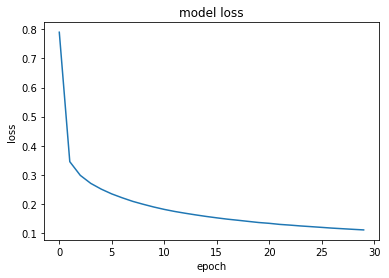

In [11]:
plt.plot(history2.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

#### 3. Arquitetura

In [12]:
classifier = Sequential()
classifier.add(Dense(units=30, activation='relu', input_shape=(x_train.shape[1],)))
classifier.add(Dense(units=30, activation='relu'))
classifier.add(Dropout(rate=0.5))
classifier.add(Dense(D_out, activation='softmax'))

classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 30)                23550     
_________________________________________________________________
dense_8 (Dense)              (None, 30)                930       
_________________________________________________________________
dropout_1 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                310       
Total params: 24,790
Trainable params: 24,790
Non-trainable params: 0
_________________________________________________________________


In [13]:
classifier.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
history3 = classifier.fit(x=x_train, y=y_train_oh, epochs=30, verbose=1, validation_data=(x_test, y_test_oh))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 7s 116us/step - loss: 0.6745 - acc: 0.7868 - val_loss: 0.2231 - val_acc: 0.9356
Epoch 2/30
60000/60000 [==============================] - 7s 116us/step - loss: 0.3691 - acc: 0.8929 - val_loss: 0.1805 - val_acc: 0.9450
Epoch 3/30
60000/60000 [==============================] - 10s 167us/step - loss: 0.3013 - acc: 0.9137 - val_loss: 0.1628 - val_acc: 0.9524
Epoch 4/30
60000/60000 [==============================] - 7s 119us/step - loss: 0.2682 - acc: 0.9223 - val_loss: 0.1479 - val_acc: 0.9553
Epoch 5/30
60000/60000 [==============================] - 7s 117us/step - loss: 0.2441 - acc: 0.9292 - val_loss: 0.1434 - val_acc: 0.9594
Epoch 6/30
60000/60000 [==============================] - 7s 111us/step - loss: 0.2268 - acc: 0.9336 - val_loss: 0.1382 - val_acc: 0.9619
Epoch 7/30
60000/60000 [==============================] - 6s 100us/step - loss: 0.2135 - acc: 0.9371 - val_loss: 0.1385 -

Text(0.5,0,'epoch')

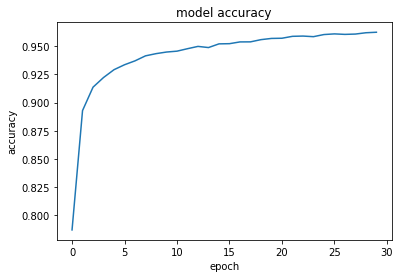

In [31]:
plt.plot(history3.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

Text(0.5,0,'epoch')

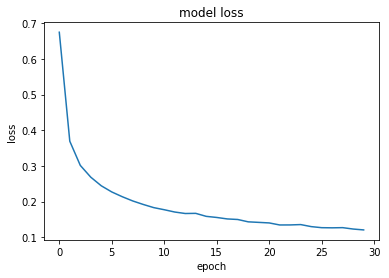

In [15]:
plt.plot(history3.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

#### 4. Arquitetura

In [21]:
classifier = Sequential()
classifier.add(Dense(units=30, activation='relu', input_shape=(x_train.shape[1],)))
classifier.add(Dense(units=30, activation='relu'))
classifier.add(Dense(units=30, activation='relu'))
classifier.add(Dense(D_out, activation='sigmoid'))

classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 30)                23550     
_________________________________________________________________
dense_19 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_20 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_21 (Dense)             (None, 10)                310       
Total params: 25,720
Trainable params: 25,720
Non-trainable params: 0
_________________________________________________________________


In [22]:
classifier.compile(optimizer='sgd', loss='categorical_crossentropy',  metrics=['accuracy'])
history4 = classifier.fit(x=x_train, y=y_train_oh, epochs=30, verbose=1, validation_data=(x_test, y_test_oh))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 6s 104us/step - loss: 1.2414 - acc: 0.6142 - val_loss: 0.4488 - val_acc: 0.8648
Epoch 2/30
60000/60000 [==============================] - 6s 99us/step - loss: 0.3678 - acc: 0.8944 - val_loss: 0.3018 - val_acc: 0.9145
Epoch 3/30
60000/60000 [==============================] - 6s 102us/step - loss: 0.2866 - acc: 0.9163 - val_loss: 0.2483 - val_acc: 0.9258
Epoch 4/30
60000/60000 [==============================] - 6s 100us/step - loss: 0.2467 - acc: 0.9280 - val_loss: 0.2156 - val_acc: 0.9361
Epoch 5/30
60000/60000 [==============================] - 6s 100us/step - loss: 0.2190 - acc: 0.9363 - val_loss: 0.2236 - val_acc: 0.9337
Epoch 6/30
60000/60000 [==============================] - 6s 102us/step - loss: 0.1986 - acc: 0.9429 - val_loss: 0.1879 - val_acc: 0.9434
Epoch 7/30
60000/60000 [==============================] - 6s 108us/step - loss: 0.1812 - acc: 0.9473 - val_loss: 0.1706 - v

Text(0.5,0,'epoch')

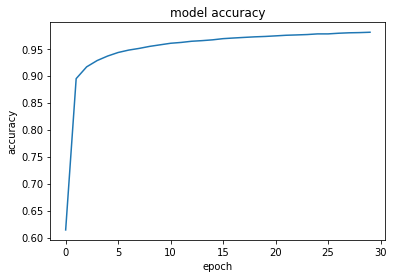

In [32]:
plt.plot(history4.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

Text(0.5,0,'epoch')

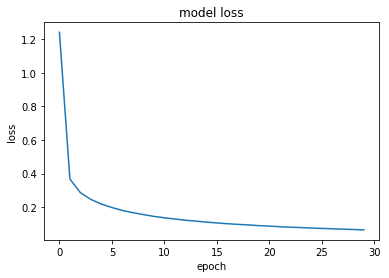

In [24]:
plt.plot(history4.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

In [25]:
classifier = Sequential()
classifier.add(Dense(units=30, activation='relu', input_shape=(x_train.shape[1],)))
classifier.add(Dense(units=30, activation='relu'))
classifier.add(Dense(units=30, activation='relu'))
classifier.add(Dense(D_out, activation='softmax'))

classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 30)                23550     
_________________________________________________________________
dense_23 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_24 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_25 (Dense)             (None, 10)                310       
Total params: 25,720
Trainable params: 25,720
Non-trainable params: 0
_________________________________________________________________


In [27]:
classifier.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
history5 = classifier.fit(x=x_train, y=y_train_oh, epochs=30, verbose=1, validation_data=(x_test, y_test_oh))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 7s 119us/step - loss: 0.1980 - acc: 0.9421 - val_loss: 0.1599 - val_acc: 0.9527
Epoch 2/30
60000/60000 [==============================] - 9s 145us/step - loss: 0.1462 - acc: 0.9571 - val_loss: 0.1402 - val_acc: 0.9544
Epoch 3/30
60000/60000 [==============================] - 11s 177us/step - loss: 0.1216 - acc: 0.9640 - val_loss: 0.1216 - val_acc: 0.9622
Epoch 4/30
60000/60000 [==============================] - 6s 105us/step - loss: 0.1045 - acc: 0.9681 - val_loss: 0.1302 - val_acc: 0.9614
Epoch 5/30
60000/60000 [==============================] - 6s 98us/step - loss: 0.0924 - acc: 0.9711 - val_loss: 0.1162 - val_acc: 0.9642
Epoch 6/30
60000/60000 [==============================] - 11s 183us/step - loss: 0.0834 - acc: 0.9748 - val_loss: 0.1164 - val_acc: 0.9678
Epoch 7/30
60000/60000 [==============================] - 7s 115us/step - loss: 0.0758 - acc: 0.9764 - val_loss: 0.0983 -

Text(0.5,0,'epoch')

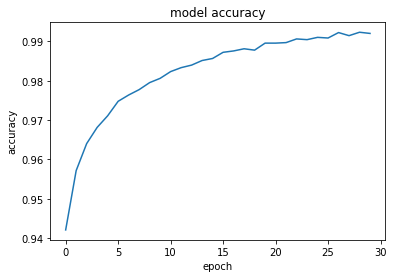

In [33]:
plt.plot(history5.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

Text(0.5,0,'epoch')

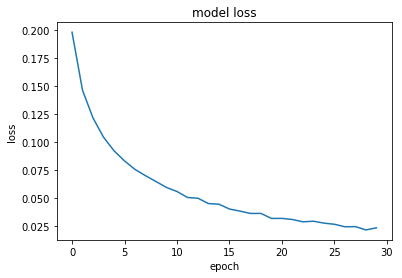

In [29]:
plt.plot(history5.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

## Comparações

A melhor arquitetura dentre as apresentadas, foi a **5** como podemos verificar na tabela abaixo:

| Arquitetura |Camadas|Neurônios|Funções de Ativação|Otimizador| Função de custo        | Épocas | Acc  | Loss |
|:-----------:|:-----:|:-------:|-------------------|:--------:|------------------------|:------:|------|------|
| 1           | 3     | 50      |relu, relu, sigmoid|adam      |categorical_crossentropy| 30     |0.9771|0.0707|
| 2           | 3     | 60      |relu, relu, softmax|sgd       |categorical_crossentropy| 30     |0.9678|0.1107|
| 3           | 3     | 70      |relu, relu, softmax|adam      |categorical_crossentropy| 30     |0.9625|0.1204|
| 4           | 4     | 100     |relu, relu,relu, sigmoid|sgd   |categorical_crossentropy| 30     |0.9804|0.0653|
| 5           | 4     | 100     |relu, relu,relu, softmax|adam  |categorical_crossentropy| 30     |0.9920|0.0238|